In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')
np.random.seed(random_state)
train_size = 0.67
random_state = 19 # any positive integer is acceptable, it is necessary for **reproducibility

In [175]:
df = pd.read_csv('/content/winequality-red.csv' , sep= ';')
print("Shape of the input data {}".format(df.shape))

Shape of the input data (1599, 12)


In [176]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


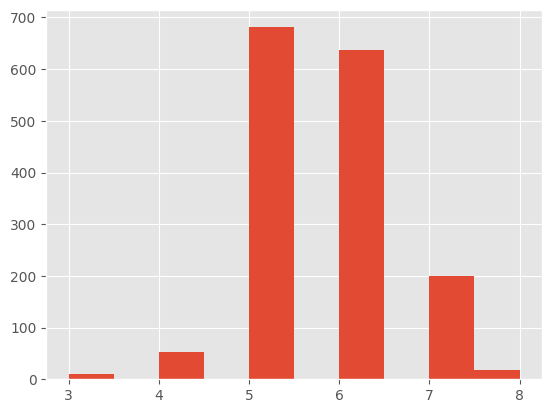

In [177]:
plt.hist(df['quality'])
plt.show()

In [178]:
X = df.drop('quality' , axis = 1)
y = df['quality']

In [179]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [180]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


prepare baseline holdout method

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_size, random_state=random_state)

In [182]:
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 1071 samples in the training dataset
There are 528 samples in the testing dataset
Each sample has 11 features


In [183]:
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state=random_state)
estimator.fit(X_train, y_train)
y_train_pred = estimator.predict(X_train)

In [184]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, y_train_pred)
print("The training accuracy is {}%".format((train_acc)*100))

The training accuracy is 100.0%


In [185]:
y_test_pred = estimator.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("The training accuracy is {}%".format((test_acc)*100))

The training accuracy is 63.25757575757576%


In [186]:
fitted_depth = estimator.get_depth()
print("The fitted depth of the baseline model is " , fitted_depth)

The fitted depth of the baseline model is  17


In [187]:
#prepare dt and scores by setting hyperparams
dt_parms = [ {'max_depth' : [*range(1,fitted_depth+1)],
              'criterion' : ['gini' , 'entropy'],
              'class_weight' : [None , 'balanced']
              }
]

In [188]:
scores = ['precision_macro'
        , 'precision_weighted'
        , 'recall_macro'
        , 'recall_weighted'
        , 'f1_macro'
        , 'f1_weighted'
        , 'accuracy']

In [189]:
n_splits = 3

In [190]:
#as the target class is highly imbalanced, we will implement stratifiedkfold
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits= n_splits , shuffle = True , random_state = random_state)

In [191]:
import warnings
warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

Tuning for: precision_macro
Best params: {'class_weight': None, 'criterion': 'gini', 'max_depth': 9}
Best CV score: 0.3491712179790323
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.20      0.12      0.15        17
           5       0.66      0.71      0.68       220
           6       0.59      0.56      0.58       206
           7       0.51      0.55      0.53        73
           8       0.00      0.00      0.00         8

    accuracy                           0.60       528
   macro avg       0.33      0.32      0.32       528
weighted avg       0.58      0.60      0.59       528



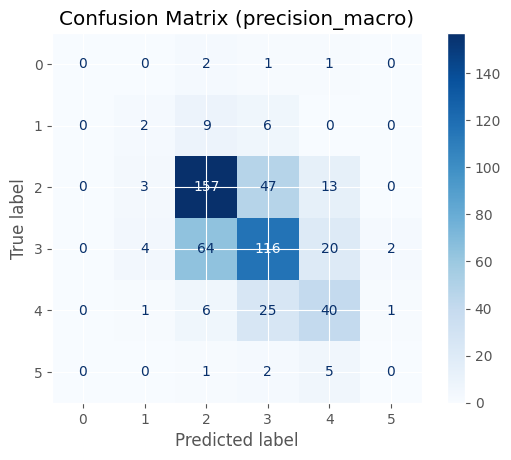

Tuning for: precision_weighted
Best params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 14}
Best CV score: 0.5758026403657238
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.05      0.06      0.06        17
           5       0.66      0.62      0.64       220
           6       0.55      0.58      0.57       206
           7       0.50      0.55      0.52        73
           8       0.25      0.12      0.17         8

    accuracy                           0.56       528
   macro avg       0.34      0.32      0.33       528
weighted avg       0.57      0.56      0.56       528



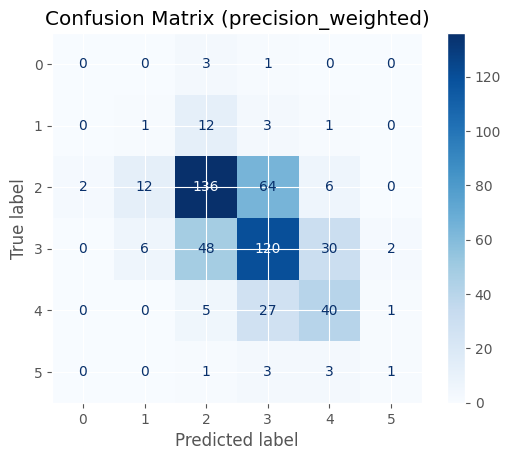

Tuning for: recall_macro
Best params: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3}
Best CV score: 0.3652685821803469
              precision    recall  f1-score   support

           3       0.05      0.50      0.09         4
           4       0.03      0.06      0.04        17
           5       0.68      0.46      0.55       220
           6       0.53      0.24      0.33       206
           7       0.17      0.23      0.20        73
           8       0.04      0.62      0.08         8

    accuracy                           0.33       528
   macro avg       0.25      0.35      0.21       528
weighted avg       0.51      0.33      0.39       528



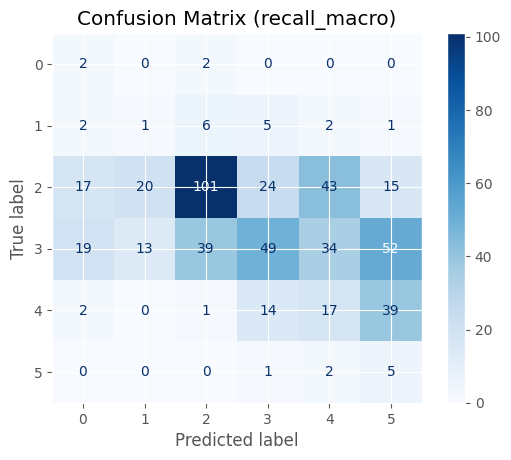

Tuning for: recall_weighted
Best params: {'class_weight': None, 'criterion': 'gini', 'max_depth': 8}
Best CV score: 0.5816993464052288
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.12      0.06      0.08        17
           5       0.63      0.69      0.66       220
           6       0.52      0.54      0.53       206
           7       0.58      0.49      0.53        73
           8       0.00      0.00      0.00         8

    accuracy                           0.57       528
   macro avg       0.31      0.30      0.30       528
weighted avg       0.55      0.57      0.56       528



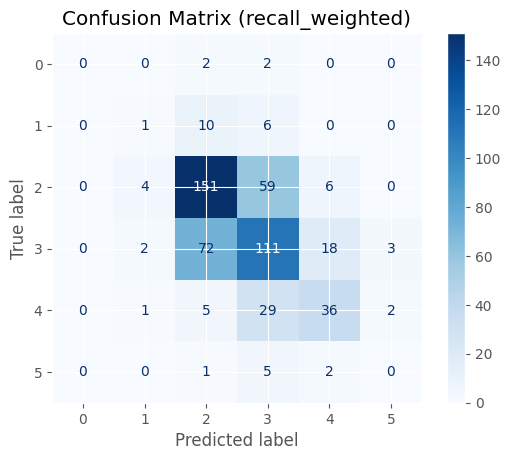

Tuning for: f1_macro
Best params: {'class_weight': None, 'criterion': 'gini', 'max_depth': 9}
Best CV score: 0.3219907187846897
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.20      0.12      0.15        17
           5       0.66      0.71      0.68       220
           6       0.59      0.56      0.58       206
           7       0.51      0.55      0.53        73
           8       0.00      0.00      0.00         8

    accuracy                           0.60       528
   macro avg       0.33      0.32      0.32       528
weighted avg       0.58      0.60      0.59       528



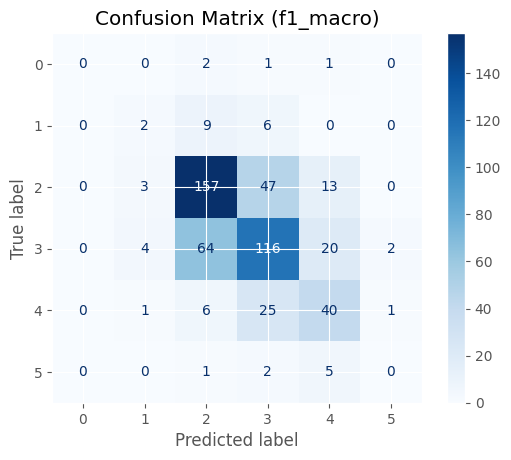

Tuning for: f1_weighted
Best params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 14}
Best CV score: 0.5724408134720355
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.05      0.06      0.06        17
           5       0.66      0.62      0.64       220
           6       0.55      0.58      0.57       206
           7       0.50      0.55      0.52        73
           8       0.25      0.12      0.17         8

    accuracy                           0.56       528
   macro avg       0.34      0.32      0.33       528
weighted avg       0.57      0.56      0.56       528



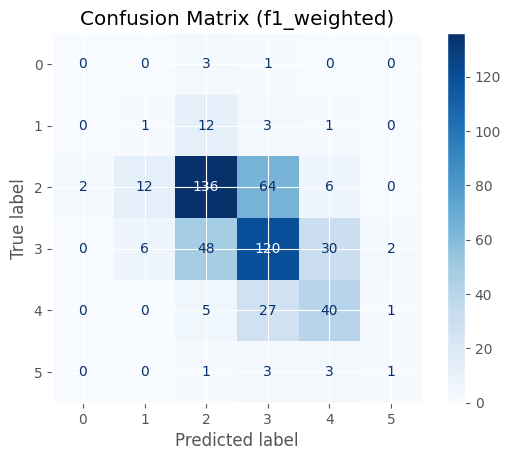

Tuning for: accuracy
Best params: {'class_weight': None, 'criterion': 'gini', 'max_depth': 8}
Best CV score: 0.5816993464052288
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.12      0.06      0.08        17
           5       0.63      0.69      0.66       220
           6       0.52      0.54      0.53       206
           7       0.58      0.49      0.53        73
           8       0.00      0.00      0.00         8

    accuracy                           0.57       528
   macro avg       0.31      0.30      0.30       528
weighted avg       0.55      0.57      0.56       528



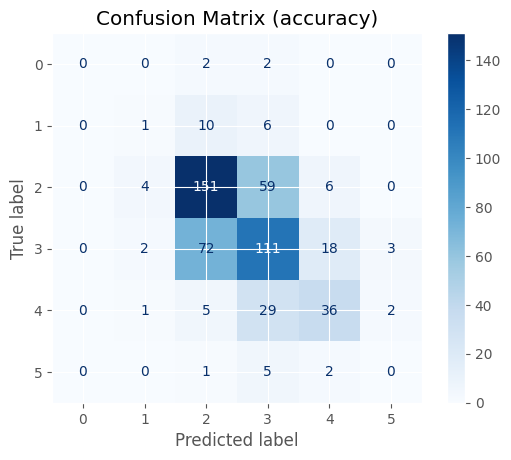

In [192]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1️ Define Stratified K-Fold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

# 2️ Loop over each scoring metric
for score in scores:
    print("="*50)
    print("Tuning for:", score)

    # 3️ Grid Search
    clf = GridSearchCV(
        estimator=estimator,
        param_grid=dt_parms,
        scoring=score,
        cv=skf
    )

    # 4️ Train
    clf.fit(X_train, y_train)

    # 5️ Best parameters + score
    print("Best params:", clf.best_params_)
    print("Best CV score:", clf.best_score_)

    # 6️ Predict on test
    y_pred = clf.best_estimator_.predict(X_test)

    # 7️ Report
    print(classification_report(y_test, y_pred, zero_division=0))

    # 8️ Confusion matrix (simple plot)
    cm = confusion_matrix(y_test, y_pred)

    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues" )
    plt.title(f"Confusion Matrix ({score})")
    plt.show()



In [195]:
from sklearn.tree import DecisionTreeClassifier

best_model = DecisionTreeClassifier(
    random_state=random_state,
    class_weight="balanced",
    criterion="gini",
    max_depth=14
)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)


In [199]:
print("As the classes were imbalanced, i choode the F1-weighted score ")

As the classes were imbalanced, i choode the F1-weighted score 


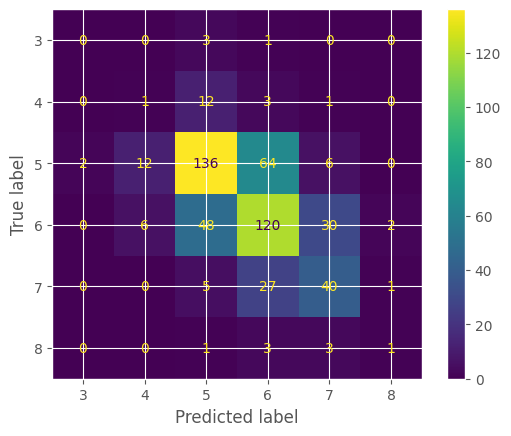

In [201]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model.classes_)
disp.plot()
plt.show()